<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Value_at_Risk_(VaR)_of_a_Stock_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Calculate periodic returns of the stocks in the portfolio

In [3]:
pip install fix_yahoo_finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix_yahoo_finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7074 sha256=150e4da90aa98d002e6e87518346114d44d29c82b1a00c511c55c94df2db8d9e
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix_yahoo_finance


In [12]:

import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import datetime as dt

# Create our portfolio of equities
tickers = ['AAPL','META', 'C', 'DIS']

# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])

# Set an initial investment level
initial_investment = 1000000

# Download closing prices
data = yf.download(tickers, start="2018-01-01", end=dt.date.today())['Close']

# Calculate periodic returns, assuming data is in DataFrame format
returns = data.pct_change()

returns.tail()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,C,DIS,META
Date,,,,
2024-03-22,0.005310,-0.008316,-0.007112,0.003584
2024-03-25,-0.008300,0.002137,0.030120,-0.012873
2024-03-26,-0.006673,0.011649,0.004775,-0.014174
2024-03-27,0.021213,0.017678,0.008755,-0.004094
2024-03-28,-0.010559,0.007809,0.011407,-0.016766


In [13]:
# Create a covariance matrix based on the returns
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix

Ticker,AAPL,C,DIS,META
Ticker,,,,
AAPL,0.000390,0.000204,0.000180,0.000297
C,0.000204,0.000527,0.000266,0.000213
DIS,0.000180,0.000266,0.000399,0.000209
META,0.000297,0.000213,0.000209,0.000736


In [ ]:
#Calculate the portfolio mean and standard deviation

In [17]:
# Calculate mean returns for each stock
avg_rets = returns.mean()

# Calculate mean returns for portfolio overall,
# using dot product to
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
print(port_mean)

# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print(port_stdev)

# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
print(mean_investment)
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev
print(stdev_investment)

0.0006559859170801917
0.017798923731908722
1000655.9859170803
17798.923731908722


In [ ]:
#Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean

In [18]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [10]:
#Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4

In [20]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1



28620.638339182362

In [ ]:
#Value at risk over n-day time period

In [25]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

1 day VaR @ 95% confidence: 28620.64
2 day VaR @ 95% confidence: 40475.69
3 day VaR @ 95% confidence: 49572.4
4 day VaR @ 95% confidence: 57241.28
5 day VaR @ 95% confidence: 63997.69
6 day VaR @ 95% confidence: 70105.96
7 day VaR @ 95% confidence: 75723.09
8 day VaR @ 95% confidence: 80951.39
9 day VaR @ 95% confidence: 85861.92
10 day VaR @ 95% confidence: 90506.41
11 day VaR @ 95% confidence: 94923.92
12 day VaR @ 95% confidence: 99144.8
13 day VaR @ 95% confidence: 103193.18
14 day VaR @ 95% confidence: 107088.62
15 day VaR @ 95% confidence: 110847.26


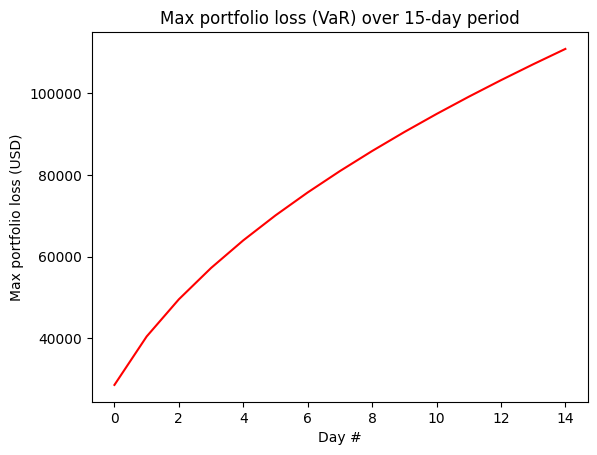

In [26]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

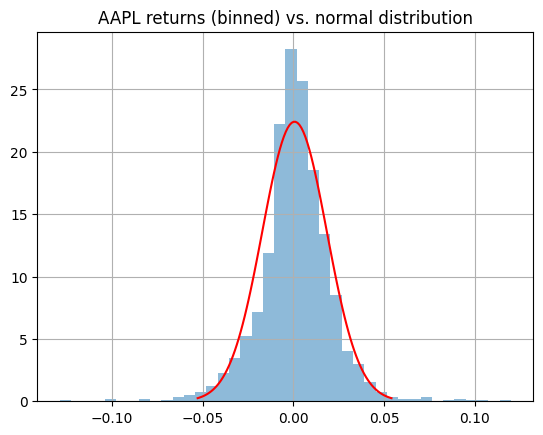

In [30]:
# Repeat for each equity in portfolio
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

returns['AAPL'].hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

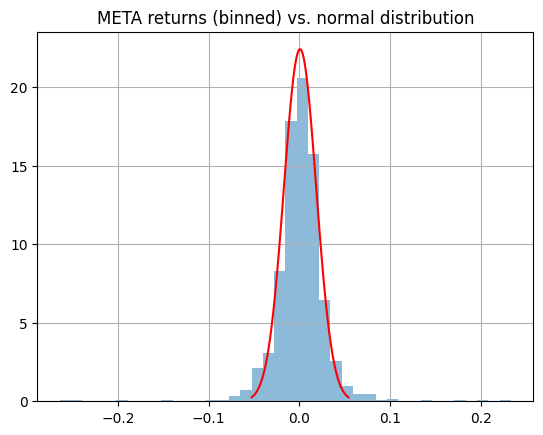

In [32]:
returns['META'].hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("META returns (binned) vs. normal distribution")
plt.show()